In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy
%matplotlib inline

In [139]:
class phenomena:
    """A class to describe the scale of a phenomena"""
    def __init__(self, label, horz_range, vert_range, time_range):
        """
        Constructs a "phenomena"
        label       - A string used for labelling the phenomena in plots and lists
        horz_range  - Tuple of (shortest,longest) horizontal length scale of phenomena
        vertz_range - Tuple of (shortest,longest) vertical length scale of phenomena
        time_range  - Tuple of (fastest,slowest) time scale of phenomena
        
        e.g.
        >>> phenomena( 'Wind waves', (0.01,50), (.002,10), (1,120) )
        """
        self.label = label
        self.horz_range = horz_range
        self.vert_range = vert_range
        self.time_range = time_range
    def __str__(self):
        return '%40s: H(%.0e:%.0e) V(%.0e:%.0e) T(%.0e:%.0e)'%(
        self.label.replace('\n',' ').strip(),
        self.horz_range[0], self.horz_range[1],
        self.vert_range[0], self.vert_range[1],
        self.time_range[0], self.time_range[1])
    def pcoords(self, orient=('h','v'), log=False):
        if orient[0]=='h': horz_range = self.horz_range
        elif orient[0]=='v': horz_range = self.vert_range
        elif orient[0]=='t': horz_range = self.time_range
        else: raise Exception('1st element of orient is not h, v or t')
        if orient[1]=='h': vert_range = self.horz_range
        elif orient[1]=='v': vert_range = self.vert_range
        elif orient[1]=='t': vert_range = self.time_range
        else: raise Exception('2nd element of orient is not h, v or t')
        x0,x1,y0,y1 = horz_range[0],horz_range[1],vert_range[0],vert_range[1]
        if log: return numpy.log10(x0),numpy.log10(x1),numpy.log10(y0),numpy.log10(y1)
        return x0,x1,y0,y1
    def rect(self, orient=('h','v'), log=False):
        x0,x1,y0,y1 = self.pcoords(orient=orient, log=log)
        return mpl.patches.Rectangle( (x0,y0), x1-x0, y1-y0)
    def ellipse(self, orient=('h','v'), log=False, **kw):
        x0,x1,y0,y1 = self.pcoords(orient=orient, log=log)
        return mpl.patches.Ellipse( ((x0+x1)/2,(y0+y1)/2), x1-x0, y1-y0, **kw)
    def text(self, orient=('h','v'), log=False, fontsize=12):
        x0,x1,y0,y1 = self.pcoords(orient=orient, log=log)
        if log: tx,ty = (x0+x1)/2, (y0+y1)/2
        else: tx,ty = numpy.exp( ( numpy.log(x0) + numpy.log(x1) )/2 ),numpy.exp( ( numpy.log(y0) + numpy.log(y1) )/2 )
        plt.text( tx, ty, self.label, fontsize=fontsize,
            horizontalalignment='center', verticalalignment='center', clip_on=True)
    def plot(self, ax):
        ax.add_patch( self.rect() );
        self.text()

In [140]:
# These variables provide a convenient way to specify scales in different units
# e.g. For 2 weeks, instead of writing "2*7*86400" use "2*wk" 
um, mm, cm, m, km = 1e-6, 1e-3, 1e-2, 1, 1e3
ms, s, mn, hr, dy, wk, mo, yr, ky = 1e-3, 1, 60, 3600, 86400, 86400*7, 30*86400, 365*86400, 365e3*86400

# Most plots need these annotations
def annotate(shortest=1*um, longest=10000*km, fastest=1*ms, slowest=10000*yr):
    lsh,llo,lfa,lsl = numpy.log10(shortest), numpy.log10(longest), numpy.log10(fastest), numpy.log10(slowest)
    plt.xlabel('Length scale', fontsize=14); plt.ylabel('Time scale', fontsize=14);
    x0,y1,y2 = lsh + 0.01 * ( llo - lsh ), lfa + 0.12 * ( lsl - lfa), lfa + 0.95 * ( lsl - lfa)
    plt.text(x0, y2, 'Slow', rotation=90, fontsize=18, color='grey');
    plt.text(x0, y1, 'Fast', rotation=90, fontsize=18, color='grey');
    y0,x1,x2 = lfa + 0.015 * ( lsl - lfa), lsh + 0.05 * ( llo - lsh ), lsh + 0.9 * ( llo - lsh )
    plt.text(x1, y0, 'Short', fontsize=18, color='grey');
    plt.text(x2, y0, 'Long', fontsize=18, color='grey');
    plt.xlim(lsh,llo); plt.ylim(lfa,lsl);

In [142]:
ocean = {}
ocean['kolmogorov']        = phenomena('Kolmogorov',
                                       (100*um,2*mm),(100*um,2*mm),(10*ms,10*s))
ocean['spray and bubbles'] = phenomena('Spray and bubbles',
                                       (10*um,1*mm),(10*um,1*mm),(100*ms,10*s))
ocean['capillary']         = phenomena('Capillary\nwaves',
                                       (1*mm,10*cm),(0.1*mm,1*cm),(100*ms,20*s))
ocean['double diffusion']  = phenomena('Double diffusion\n+\nsalt fingering',
                                       (1*mm,10*cm),(1*mm,10*m),(1*mn,1*hr))
ocean['biology']           = phenomena('Biologically\ngenerated\nturbulence',
                                       (1*cm,10*m),(1*cm,10*m),(0.2*s,10*s))
ocean['boundry turbulence']= phenomena('Vertical\nturbulence\n\n\n\n',
                                       (1*cm,10*m),(1*cm,10*m),(0.1*s,1*hr))
ocean['wind waves']        = phenomena('Wind waves',
                                       (1*cm,50*m),(2*mm,10*m),(1*s,2*mn))
ocean['swell']             = phenomena('Swell',
                                       (10*m,1*km),(2*m,200*m),(1*mn,1*dy))
ocean['langmuir']          = phenomena('Langmuir turbulence',
                                       (10*m,200*m),(10*m,200*m),(30*s,6*hr))
ocean['convection']        = phenomena('Deep convection',
                                       (1*m,500*m),(1*m,5*km),(5*mn,1*dy))
ocean['internal waves']    = phenomena('Internal waves\n+ Inertial motions     \n\n\n\n',
                                       (1*m,10*km),(1*m,500*m),(1*mn,2*dy))
ocean['sub-mesoscale']     = phenomena('\nSub-mesoscale',
                                       (200*m,5*km),(1*m,200*m),(2*hr,2*dy))
ocean['upwelling']         = phenomena('Boundary\nupwelling',
                                       (2*km,30*km),(10*m,500*m),(3*dy,1*yr))
ocean['internal tides']    = phenomena('Internal tides',
                                       (200*m,50*km),(10*m,5*km),(12*hr,2*dy))
ocean['mesoscale']         = phenomena('\nMesoscale\neddies',
                                       (2*km,90*km),(100*m,2*km),(12*hr,6*mo))
ocean['barotropic']        = phenomena('\n\nBarotropic\neddies',
                                       (30*km,200*km),(100*m,5*km),(3*dy,6*mo))
ocean['tropical']          = phenomena('Tropical\nwaves',
                                       (50*km,200*km),(50*m,500*m),(1*wk,1*yr))
ocean['western']           = phenomena('Boundary  \ncurrents',
                                       (20*km,150*km),(500*m,1*km),(1*mo,7*yr))
ocean['basin tide']        = phenomena('Tides',
                                       (50*km,5000*km),(500*m,5*km),(12*hr,2*dy))
ocean['rossby']            = phenomena('Rossby waves\n\n',
                                       (50*km,5000*km),(200*m,2*km),(2*wk,30*yr))
ocean['gyres']             = phenomena('Gyres',
                                       (500*km,5000*km),(500*m,5*km),(2*yr,50*yr))
ocean['seasons']           = phenomena('Seasonal\ncycle',
                                       (100*km,5000*km),(50*m,5*km),(6*mo,1.5*yr))
ocean['nino']              = phenomena('El Niño',
                                       (100*km,5000*km),(50*m,2*km),(2*yr,10*yr))
ocean['climate']           = phenomena('Climate change',
                                       (100*km,5000*km),(50*m,5*km),(10*yr,10000*yr))
for k in ocean: print(ocean[k])

                              Kolmogorov: H(1e-04:2e-03) V(1e-04:2e-03) T(1e-02:1e+01)
                       Spray and bubbles: H(1e-05:1e-03) V(1e-05:1e-03) T(1e-01:1e+01)
                         Capillary waves: H(1e-03:1e-01) V(1e-04:1e-02) T(1e-01:2e+01)
       Double diffusion + salt fingering: H(1e-03:1e-01) V(1e-03:1e+01) T(6e+01:4e+03)
       Biologically generated turbulence: H(1e-02:1e+01) V(1e-02:1e+01) T(2e-01:1e+01)
                     Vertical turbulence: H(1e-02:1e+01) V(1e-02:1e+01) T(1e-01:4e+03)
                              Wind waves: H(1e-02:5e+01) V(2e-03:1e+01) T(1e+00:1e+02)
                                   Swell: H(1e+01:1e+03) V(2e+00:2e+02) T(6e+01:9e+04)
                     Langmuir turbulence: H(1e+01:2e+02) V(1e+01:2e+02) T(3e+01:2e+04)
                         Deep convection: H(1e+00:5e+02) V(1e+00:5e+03) T(3e+02:9e+04)
       Internal waves + Inertial motions: H(1e+00:1e+04) V(1e+00:5e+02) T(6e+01:2e+05)
                           Sub-mesoscale: H

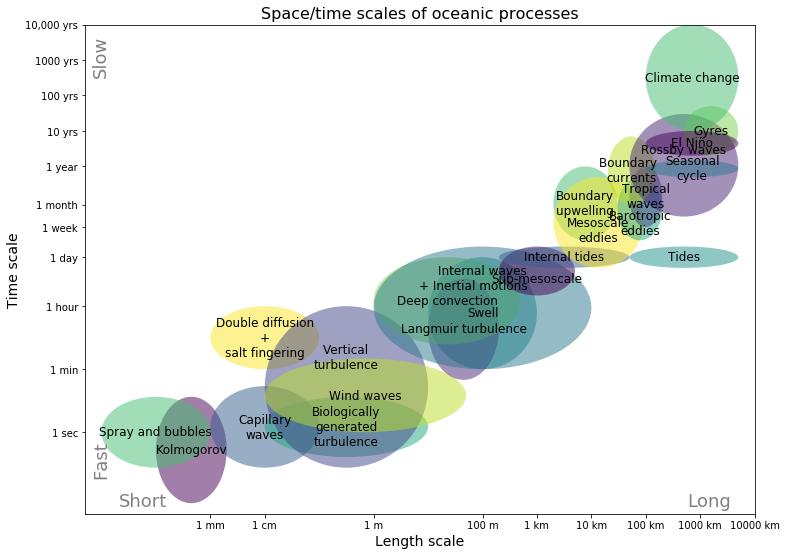

In [143]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in ocean:
    patches.append( ocean[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.mod( numpy.arange( len(patches) ), 11/7 ) )
ax.add_collection( p )
for k in ocean:
    ocean[k].text(orient=orient, log=True)
if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr, 1000*yr, 1e4*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs', '1000 yrs', '10,000 yrs'] )
plt.title('Space/time scales of oceanic processes', fontsize=16);
annotate(fastest=5*ms, slowest=10000*yr, shortest=5*um, longest=1e4*km)

In [6]:
atmos = {}
atmos['micro'] = phenomena('Microscale turbulence',
                           (1*cm,1*m),(1*cm,1*m),(.1*s,10*s))
atmos['sml cumulus'] = phenomena('Small cumulus',
                                (1*m,1*km),(1*m,1*km),(10*s,1*hr))
atmos['thermals'] = phenomena('Thermals',
                             (10*m,200*m),(10*m,200*m),(100*s,20*mn))
atmos['tornadoes'] = phenomena('Tornadoes',
                              (200*m,2*km),(200*m,2*km),(200*s,1*hr))
atmos['thunder'] = phenomena('Thunderstorms',
                            (300*m,20*km),(500*m,4*km),(20*mn,6*hr))
atmos['clusters'] = phenomena('Cloud clusters',
                             (10*km,100*km),(500*m,4*km),(3*hr,2*dy))
atmos['squall'] = phenomena('Fronts and squall lines',
                           (10*km,100*km),(500*m,4*km),(1*dy,3*dy))
atmos['cyclones'] = phenomena('Tropical cyclones',
                             (100*km,2000*km),(1*km,5*km),(1*dy,1*wk))
atmos['waves'] = phenomena('Planetary waves',
                          (400*km,30000*km),(1*km,10*km),(1*dy,3*mo))
atmos['mjo'] = phenomena('MJO',
                        (1000*km,30000*km),(2*km,10*km),(2*wk,2*mo))
atmos['seasonal'] = phenomena('Seasonal cycles',
                        (300*km,50000*km),(1*km,10*km),(3*mo,1*yr))
atmos['enso'] = phenomena('ENSO',
                        (1000*km,30000*km),(2*km,10*km),(2*mo,7*yr))
atmos['climate'] = phenomena('Climate variability',
                        (1000*km,30000*km),(2*km,10*km),(1*yr,100*yr))

for k in atmos: print(atmos[k])

                   Microscale turbulence: H(1e-02:1e+00) V(1e-02:1e+00) T(1e-01:1e+01)
                           Small cumulus: H(1e+00:1e+03) V(1e+00:1e+03) T(1e+01:4e+03)
                                Thermals: H(1e+01:2e+02) V(1e+01:2e+02) T(1e+02:1e+03)
                               Tornadoes: H(2e+02:2e+03) V(2e+02:2e+03) T(2e+02:4e+03)
                           Thunderstorms: H(3e+02:2e+04) V(5e+02:4e+03) T(1e+03:2e+04)
                          Cloud clusters: H(1e+04:1e+05) V(5e+02:4e+03) T(1e+04:2e+05)
                 Fronts and squall lines: H(1e+04:1e+05) V(5e+02:4e+03) T(9e+04:3e+05)
                       Tropical cyclones: H(1e+05:2e+06) V(1e+03:5e+03) T(9e+04:6e+05)
                         Planetary waves: H(4e+05:3e+07) V(1e+03:1e+04) T(9e+04:8e+06)
                                     MJO: H(1e+06:3e+07) V(2e+03:1e+04) T(1e+06:5e+06)
                         Seasonal cycles: H(3e+05:5e+07) V(1e+03:1e+04) T(8e+06:3e+07)
                                    ENSO: H

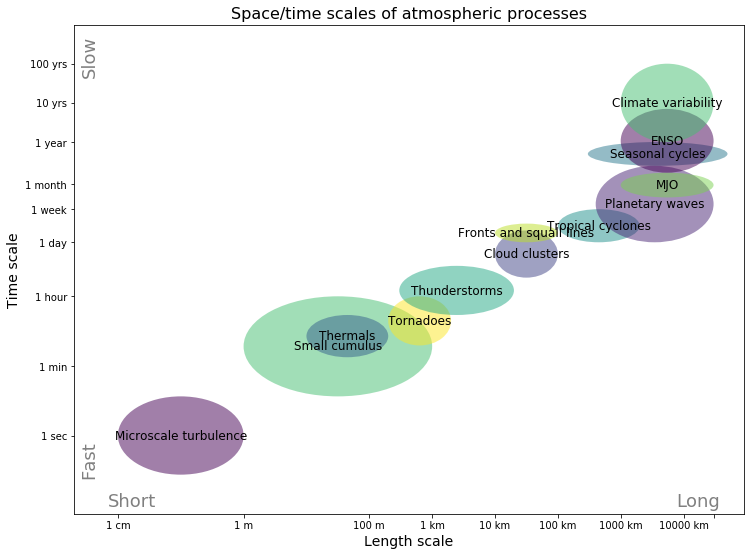

In [7]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in atmos:
    patches.append( atmos[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.mod( numpy.arange( len(patches) ), 11/7 ) )
ax.add_collection( p )
for k in atmos:
    atmos[k].text(orient=orient, log=True)
if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of atmospheric processes', fontsize=16);
annotate(fastest=10*ms, shortest=2*mm, longest=9e4*km)

In [8]:
print('Ocean equiv. of atmospheric mass %.3fm'%(1e5/(9.8*1025)))
print('Ocean equiv. of atmospheric heat capacity %.3gm'%(1e5*1005/(9.8*1025*3992)))

Ocean equiv. of atmospheric mass 9.955m
Ocean equiv. of atmospheric heat capacity 2.51m


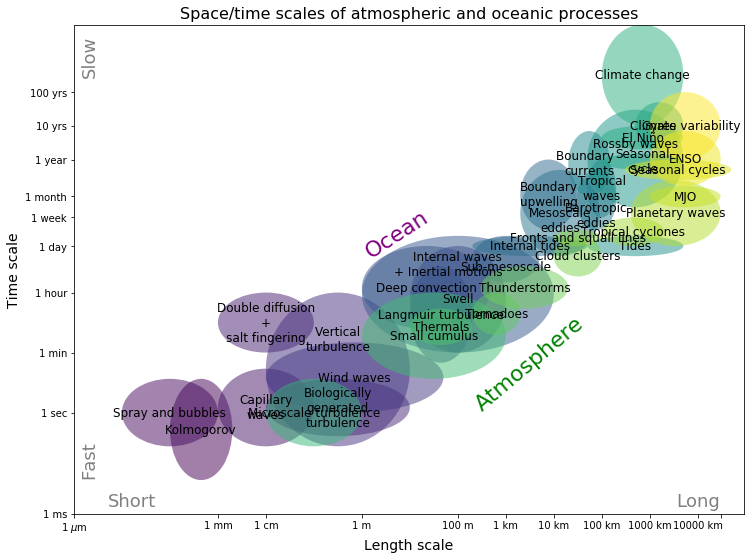

In [132]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in ocean:
    patches.append( ocean[k].ellipse(orient=orient, log=True) )
for k in atmos:
    patches.append( atmos[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.arange( len(patches) ) )
ax.add_collection( p )
for k in atmos:
    atmos[k].text(orient=orient, log=True)
for k in ocean:
    ocean[k].text(orient=orient, log=True)

if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of atmospheric and oceanic processes', fontsize=16);
plt.text(numpy.log10(1*m), numpy.log10(5*dy), 'Ocean', rotation=33, fontsize=22, color='purple');
plt.text(numpy.log10(200*m), numpy.log10(5*mn), 'Atmosphere', rotation=40, fontsize=22, color='green');
annotate(longest=9e4*km)

In [10]:
glacial_ice = {}
glacial_ice['fracturing'] = phenomena('Fracturing',
                           (1*mm,1*cm),(1*mm,1*cm),(1*ms,10*s))
glacial_ice['melt'] = phenomena('Surface processes',
                           (10*m,10*km),(1*mm,1*m),(1*wk,3*mo))
glacial_ice['stick-slip'] = phenomena('Stick-slip',
                           (1*km,10*km),(1*mm,10*cm),(1*hr,1*dy))
glacial_ice['sastrugi'] = phenomena('Sastrugi',
                           (1*cm,1*m),(1*cm,10*cm),(1*hr,2*dy))
glacial_ice['tide'] = phenomena('Tidal',
                           (10*km,100*km),(1*cm,10*cm),(12*hr,2*wk))
glacial_ice['collapse'] = phenomena('Ice-shelf collaps',
                           (10*km,100*km),(100*m,300*m),(1*wk,1*mo))
glacial_ice['calving'] = phenomena('Iceberg calving',
                           (10*m,100*km),(10*m,300*m),(1*hr,70*yr))
glacial_ice['sub-glacial'] = phenomena('Sub-glacial hydrology',
                           (10*m,1*km),(1*cm,3*m),(1*hr,2*yr))
glacial_ice['streams'] = phenomena('Ice-stream regulation',
                           (100*km,500*km),(100*m,2*km),(100*yr,1*ky))
glacial_ice['heinrich'] = phenomena('Heinrich events',
                           (100*km,1000*km),(100*m,2*km),(700*yr,12*ky))
glacial_ice['gia'] = phenomena('Glacial Isostatic Adjustment',
                           (1000*km,10000*km),(10*cm,10*m),(1*yr,10*ky))
glacial_ice['glaciation'] = phenomena('Inter-glacial',
                           (1000*km,5000*km),(100*m,2*km),(10*ky,100*ky))
for k in glacial_ice: print(glacial_ice[k])

                              Fracturing: H(1e-03:1e-02) V(1e-03:1e-02) T(1e-03:1e+01)
                       Surface processes: H(1e+01:1e+04) V(1e-03:1e+00) T(6e+05:8e+06)
                              Stick-slip: H(1e+03:1e+04) V(1e-03:1e-01) T(4e+03:9e+04)
                                Sastrugi: H(1e-02:1e+00) V(1e-02:1e-01) T(4e+03:2e+05)
                                   Tidal: H(1e+04:1e+05) V(1e-02:1e-01) T(4e+04:1e+06)
                       Ice-shelf collaps: H(1e+04:1e+05) V(1e+02:3e+02) T(6e+05:3e+06)
                         Iceberg calving: H(1e+01:1e+05) V(1e+01:3e+02) T(4e+03:2e+09)
                   Sub-glacial hydrology: H(1e+01:1e+03) V(1e-02:3e+00) T(4e+03:6e+07)
                   Ice-stream regulation: H(1e+05:5e+05) V(1e+02:2e+03) T(3e+09:3e+10)
                         Heinrich events: H(1e+05:1e+06) V(1e+02:2e+03) T(2e+10:4e+11)
            Glacial Isostatic Adjustment: H(1e+06:1e+07) V(1e-01:1e+01) T(3e+07:3e+11)
                           Inter-glacial: H

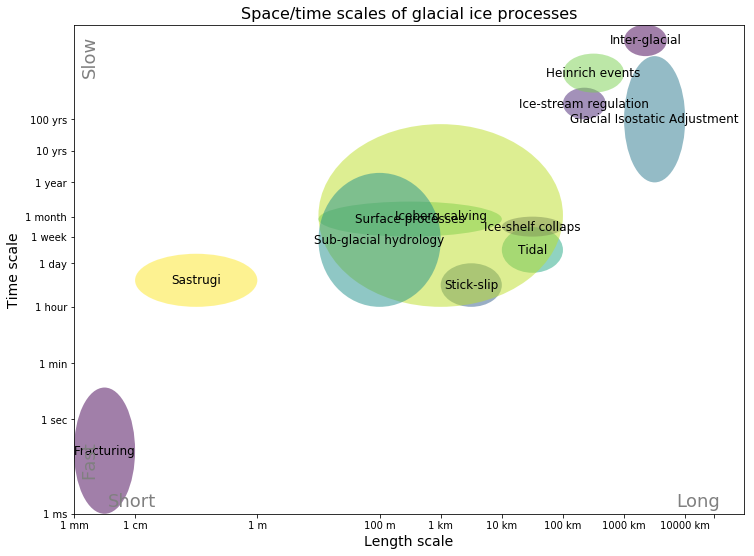

In [11]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in glacial_ice:
    patches.append( glacial_ice[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.mod( numpy.arange( len(patches) ), 11/7 ) )
ax.add_collection( p )
for k in glacial_ice:
    glacial_ice[k].text(orient=orient, log=True)
if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of glacial ice processes', fontsize=16);
annotate(fastest=1*ms, slowest=100*ky, shortest=1*mm, longest=9e4*km)

In [58]:
sea_ice = {}
# sea_ice['bottom'] = phenomena('Bottom freezing',   ###LINE
#                                         (1*mm,1*cm),(1*mm,1*cm),(1*hr,1*yr))
sea_ice['brine'] = phenomena('Brine rejection',
                                        (1*mm,1*cm),(1*mm,1*cm),(1*mn,1*dy))
sea_ice['drainage'] = phenomena('Brine drainage',
                                        (1*mm,1*cm),(1*mm,1*cm),(12*hr,3*yr))
sea_ice['conductivity 1m'] = phenomena('Conductivity 1m',
                                        (10*m,1000*km),(1*m,1.1*m),(10*dy,15*dy))
sea_ice['fracturing'] = phenomena('Fracturing',
                           (1*mm,1*m),(1*mm,1*m),(1*ms,10*s))
sea_ice['nilas'] = phenomena('Nilas',
                                        (100*m,100*km),(1*mm,10*cm),(1*hr,2*dy))
sea_ice['pancake'] = phenomena('Pancake',
                                        (10*cm,10*m),(5*mm,2*cm),(1*hr,1*dy))
sea_ice['leads'] = phenomena('Leads',
                                        (10*m,10*km),(2*cm,2*m),(30*mn,3*dy))
sea_ice['meltponds'] = phenomena('Melt Ponds',
                                        (1*m,100*m),(1*cm,1*m),(1*dy,1*mo))
sea_ice['inertial'] = phenomena('Inertial Oscillations',
                                        (100*m,10*km),(2*cm,2*m),(1*hr,2*hr))
sea_ice['ridging'] = phenomena('Ridging',
                                        (1*m,100*m),(10*cm,6*m),(1*hr,1*dy))
sea_ice['floe'] = phenomena('Floes',
                                        (10*m,10*km),(2*cm,2*m),(1*hr,1*wk))
sea_ice['waves'] = phenomena('Waves breakup',
                                        (1*m,100*m),(1*cm,1*m),(10*s,10*mn))
sea_ice['miz'] = phenomena('MIZ',
                                        (1*m,30*km),(2*cm,2*m),(1*hr,3*mo))
sea_ice['drift'] = phenomena('Drift',
                                        (1*km,1000*km),(2*cm,2*m),(1*hr,3*mo))
sea_ice['thickness'] = phenomena('Thickness anomalies',
                                        (10*km,1000*km),(2*cm,2*m),(1*mo,3*yr))

# sea_ice['SH winter-extent'] = phenomena('Winter extent',
#                                         (500*km,5000*km),(10*cm,3*m),(10*yr,10*ky))

for k in sea_ice: print(sea_ice[k])

                         Brine rejection: H(1e-03:1e-02) V(1e-03:1e-02) T(6e+01:9e+04)
                          Brine drainage: H(1e-03:1e-02) V(1e-03:1e-02) T(4e+04:9e+07)
                         Conductivity 1m: H(1e+01:1e+06) V(1e+00:1e+00) T(9e+05:1e+06)
                              Fracturing: H(1e-03:1e+00) V(1e-03:1e+00) T(1e-03:1e+01)
                                   Nilas: H(1e+02:1e+05) V(1e-03:1e-01) T(4e+03:2e+05)
                                 Pancake: H(1e-01:1e+01) V(5e-03:2e-02) T(4e+03:9e+04)
                                   Leads: H(1e+01:1e+04) V(2e-02:2e+00) T(2e+03:3e+05)
                              Melt Ponds: H(1e+00:1e+02) V(1e-02:1e+00) T(9e+04:3e+06)
                   Inertial Oscillations: H(1e+02:1e+04) V(2e-02:2e+00) T(4e+03:7e+03)
                                 Ridging: H(1e+00:1e+02) V(1e-01:6e+00) T(4e+03:9e+04)
                                   Floes: H(1e+01:1e+04) V(2e-02:2e+00) T(4e+03:6e+05)
                           Waves breakup: H

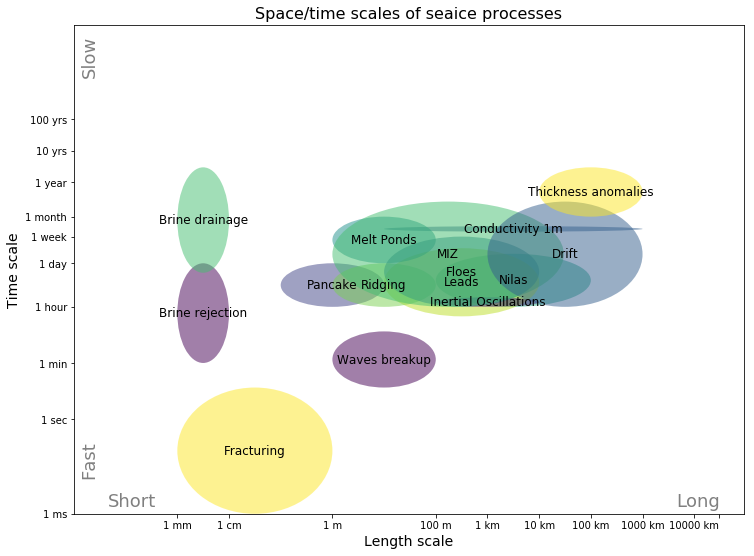

In [59]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in sea_ice:
    patches.append( sea_ice[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.mod( numpy.arange( len(patches) ), 11/7 ) )
ax.add_collection( p )
for k in sea_ice:
    sea_ice[k].text(orient=orient, log=True)
if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of seaice processes', fontsize=16);
annotate(fastest=1*ms, slowest=100*ky, shortest=10*um, longest=9e4*km)

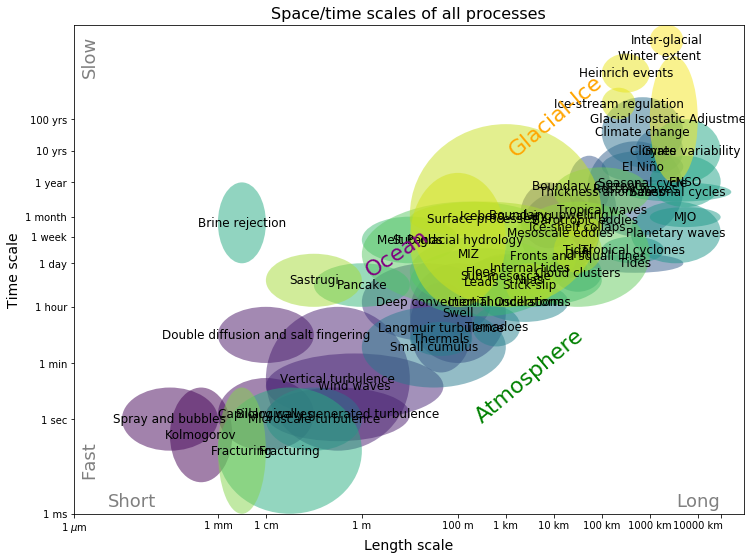

In [42]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in ocean:
    patches.append( ocean[k].ellipse(orient=orient, log=True) )
for k in atmos:
    patches.append( atmos[k].ellipse(orient=orient, log=True) )
for k in sea_ice:
    patches.append( sea_ice[k].ellipse(orient=orient, log=True) )
for k in glacial_ice:
    patches.append( glacial_ice[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.arange( len(patches) ) )
ax.add_collection( p )
for k in atmos:
    atmos[k].text(orient=orient, log=True)
for k in ocean:
    ocean[k].text(orient=orient, log=True)
for k in sea_ice:
    sea_ice[k].text(orient=orient, log=True)
for k in glacial_ice:
    glacial_ice[k].text(orient=orient, log=True)

if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of all processes', fontsize=16);
plt.text(numpy.log10(1*m), numpy.log10(5*dy), 'Ocean', rotation=33, fontsize=22, color='purple');
plt.text(numpy.log10(200*m), numpy.log10(5*mn), 'Atmosphere', rotation=40, fontsize=22, color='green');
plt.text(numpy.log10(1*km), numpy.log10(1e3*yr), 'Glacial-Ice', rotation=40, fontsize=22, color='orange');
annotate(longest=9e4*km, slowest=100*ky)

Hello theres www ffe spellling errorss 